#2021  Tokyo Olympics

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
athlete_data = pd.read_excel("Athletes.xlsx")
coach_data = pd.read_excel("Coaches.xlsx")
gender_data = pd.read_excel("EntriesGender.xlsx")
medal_data = pd.read_excel("Medals.xlsx")
team_data = pd.read_excel("Teams.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Let's look at the first few rows for each table


In [ ]:
athlete_data.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [ ]:
coach_data.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [ ]:
gender_data.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [ ]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [ ]:
team_data.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women



### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Most athlete count based on their countries
top_countries = athlete_data.NOC.value_counts().sort_values(ascending = False)
print("The top 25 countries that sent most athletes are : \n", top_countries.head(25))

The top 25 countries that sent most athletes are : 
 United States of America      615
Japan                         586
Australia                     470
People's Republic of China    401
Germany                       400
France                        377
Canada                        368
Great Britain                 366
Italy                         356
Spain                         324
ROC                           318
Brazil                        291
Netherlands                   274
Republic of Korea             223
New Zealand                   202
Poland                        195
Argentina                     180
South Africa                  171
Hungary                       155
Mexico                        155
Ukraine                       152
Egypt                         133
Sweden                        129
Belgium                       125
India                         117
Name: NOC, dtype: int64


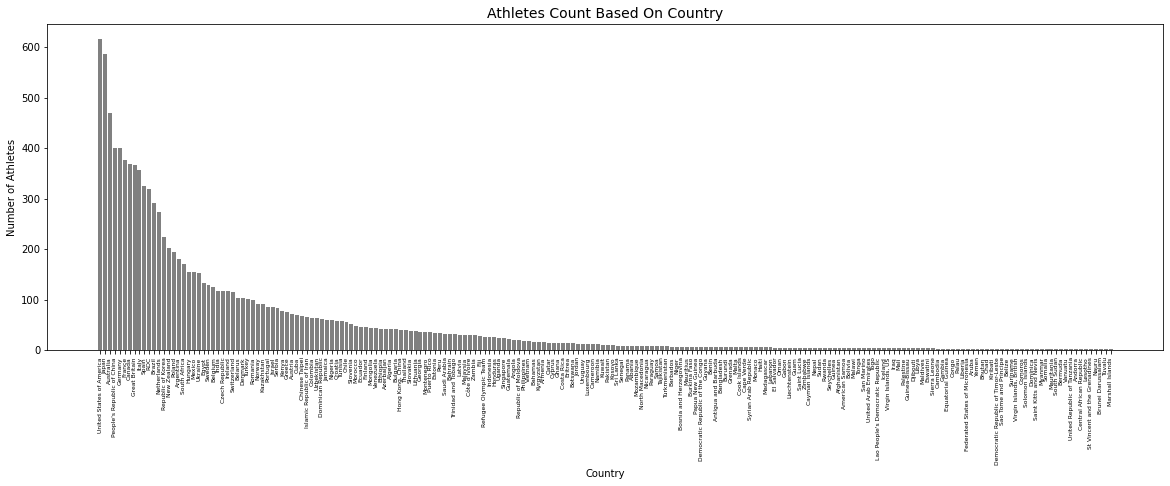

In [ ]:
#plot
plt.figure(figsize = (20,6))
plt.title('Athletes Count Based On Country', size =14)
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation = 'vertical', size = 6)
plt.bar(top_countries.index , top_countries, color = 'grey')
plt.show();


Since the above graph is very hard to read, we will plot the same graph with less number of countries , ie the top 25 countries.

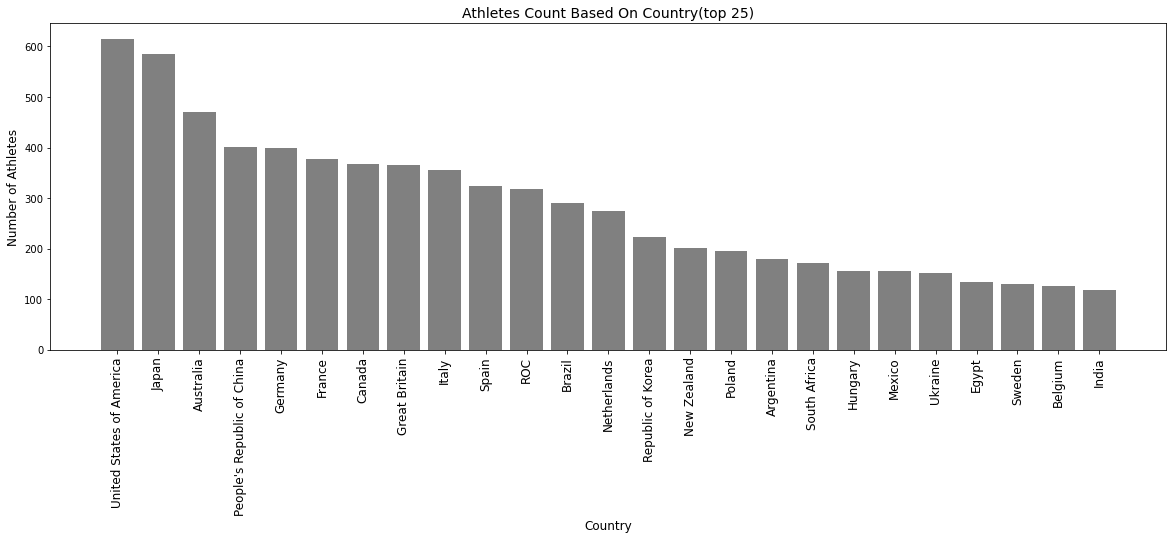

In [ ]:
top_25_countries = top_countries.head(25)
plt.figure(figsize = (20,6))
plt.title('Athletes Count Based On Country(top 25)', size =14)
plt.xlabel('Country', size = 12)
plt.ylabel('Number of Athletes', size = 12)
plt.xticks(rotation = 'vertical', size = 12)
plt.bar(top_25_countries.index , top_25_countries, color = 'grey')
plt.show();

### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

In [ ]:
#Create new dataframe using team_data and gender_data datasets
gender_count_df = team_data.merge(gender_data, how ='left', on ='Discipline')

#Filter the events for Women from that
gender_count_Woman = gender_count_df[gender_count_df.Event == 'Women']

#Drop the unwanted columns for simplicity
#gender_count_Woman.drop(['Male', 'Total'], axis = 1, inplace = True)

#Sort the new dataframe on the NOC column after groupby by NOC and finding the count for each NOC 
gender_count_Woman_sorted = gender_count_Woman.groupby('NOC').sum('Female').sort_values(by = 'Female' , ascending = False)

#Find the index value (ie, the NOC value) for the maximum count of the sorted dataframe
Most_female_country = gender_count_Woman_sorted[gender_count_Woman_sorted.Female == gender_count_Woman_sorted.Female.max()].index.get_level_values('NOC').tolist()

print("The country having most female athlete is ",str(Most_female_country)[1:-1])


The country having most female athlete is  'Japan'


In [ ]:
gender_count_Woman_sorted

,Female,Male,Total
NOC,,,
Japan,1260,1369,2629
People's Republic of China,1140,1249,2389
United States of America,948,1057,2005
Australia,916,1025,1941
Netherlands,842,946,1788
Brazil,818,903,1721
Canada,772,881,1653
Spain,674,698,1372
ROC,660,689,1349


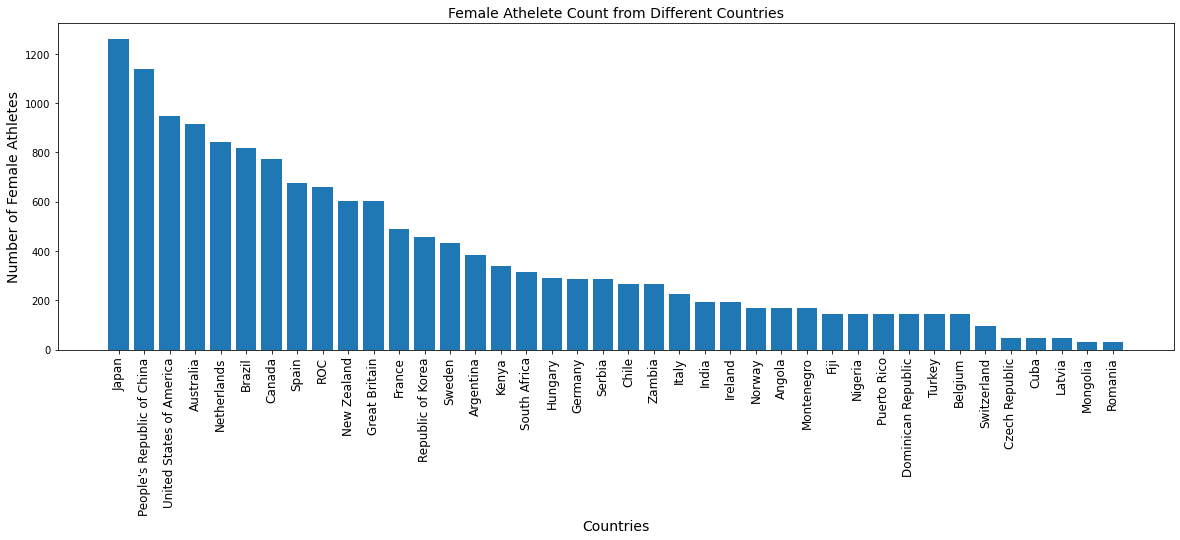

In [ ]:

#plotting the bar graph to show female athletes count from different countries
plt.figure(figsize=(20,6))
plt.xlabel("Countries", size = 14)
plt.ylabel("Number of Female Athletes" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Female Athelete Count from Different Countries", size = 14)
plt.bar(gender_count_Woman_sorted.index, gender_count_Woman_sorted['Female'], width=0.8)
plt.show()

### 3. Which country has the least female athletes?

In [ ]:
#Find the minimum value from the sorted dataframe for Female column
min_value = gender_count_Woman_sorted.Female.min()

#Find the corresponding indexes for those minimum values
y = list(gender_count_Woman_sorted.index[gender_count_Woman_sorted['Female'] == min_value])

print("The countries with the least female athletes are :", str(y)[1:-1])

The countries with the least female athletes are : 'Mongolia', 'Romania'


### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

In [ ]:
#Find the most popular sport by grouping the athlete_data dataframe based on Discipline column
popular_sport = athlete_data.Discipline.value_counts().sort_values(ascending = False)
popular_sport_name = popular_sport.idxmax()
print("The most popular sport is ", popular_sport_name)

The most popular sport is  Athletics


In [ ]:
#Country with highest participation in the most popular sport
# Creating another dataframe by selecting the data for most popular sport and then group by the country name.

y = athlete_data[athlete_data['Discipline'] == popular_sport_name]
k = y.groupby('NOC').count().reset_index()

max_value = k.max().Discipline
country_name = k.loc[k['Discipline'] == max_value, 'NOC'].iloc[0]
print("The country with highest participation in the most popular sport is ",country_name )

The country with highest participation in the most popular sport is  United States of America


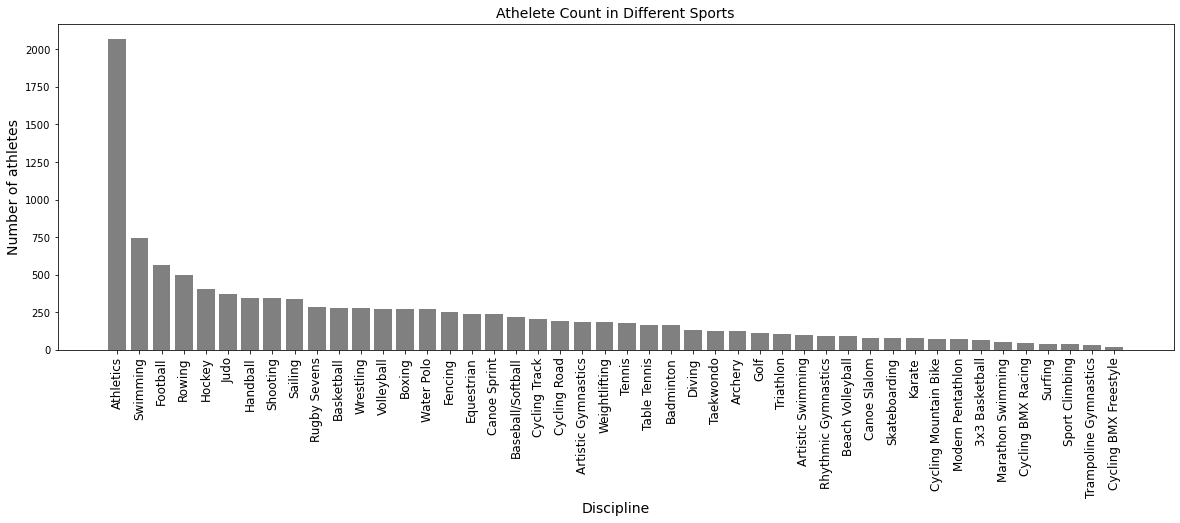

In [ ]:
#Plot the popular_sport series

plt.figure(figsize=(20,6))
plt.xlabel("Discipline", size = 14)
plt.ylabel("Number of athletes" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Athelete Count in Different Sports", size = 14)
plt.bar(popular_sport.index, popular_sport, width=0.8, color = 'grey')
plt.show()

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

In [ ]:
#Sort the gender_data dataframe on Total column
sorted_gender = gender_data.sort_values('Total', ascending=False)
#sorted_gender

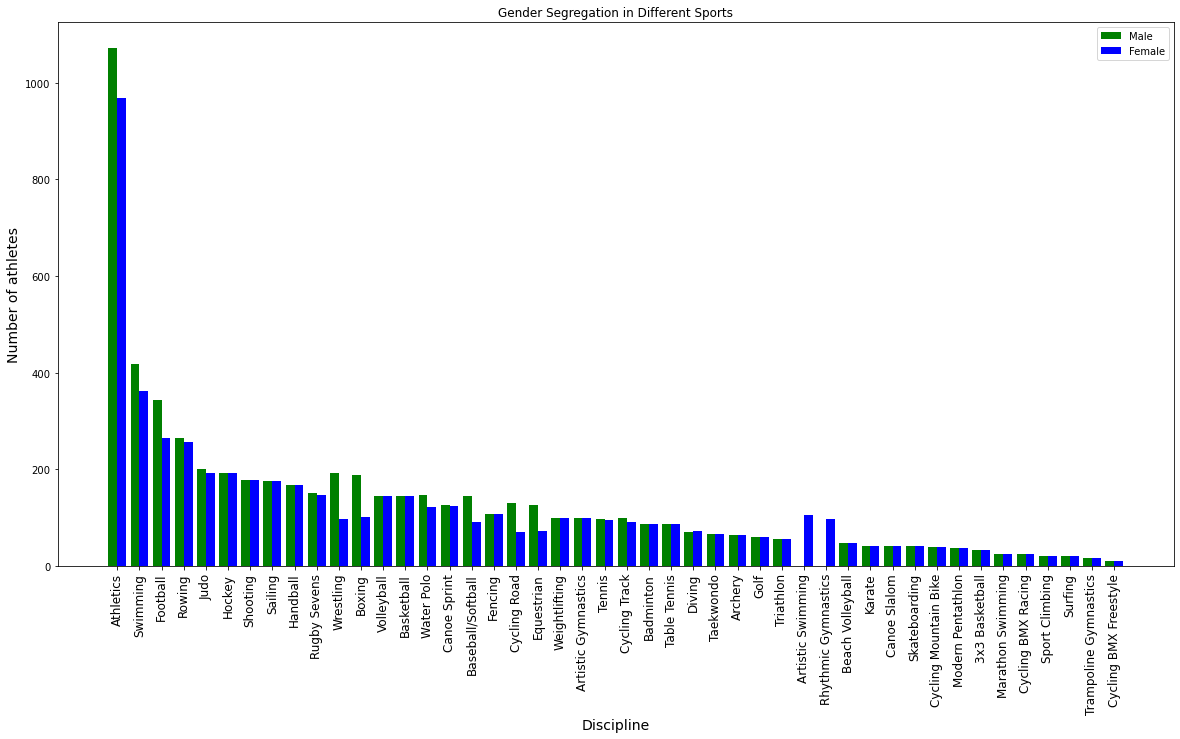

In [ ]:
#plotting categorical data from the sorted_gender dataframe
x_position = np.arange(len(sorted_gender))

x_index = [i for i in sorted_gender.Discipline ]

plt.figure(figsize=(20,10))
plt.bar(x_position - 0.2 , sorted_gender.Male , 0.4 , label = 'Male' , color ='green')
plt.bar(x_position + 0.2 , sorted_gender.Female, 0.4, label = 'Female', color = 'blue')
plt.xlabel("Discipline", size = 14)
plt.ylabel("Number of athletes" , size =14)
plt.xticks(x_position, x_index, rotation = 'vertical' ,size = 12)
plt.legend()
plt.title("Gender Segregation in Different Sports")
plt.show()

### 6. Which sport has they highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

In [ ]:
#Add a new column called Male Female Proportion in sorted_gender dataframe from above question
sorted_gender['Male Female Proportion']= sorted_gender['Male']/sorted_gender['Female']

#Sort it in Descending order
sorted_gender = sorted_gender.sort_values('Male Female Proportion', ascending=False)
max_value = sorted_gender['Male Female Proportion'].max()
#Find the sport corresponding to the maximum value
Highest_proportion_sport = sorted_gender[sorted_gender['Male Female Proportion'] == max_value].Discipline.item()
print("The sport having highest proportion of male to female athletes is ",Highest_proportion_sport)


The sport having highest proportion of male to female athletes is  Wrestling


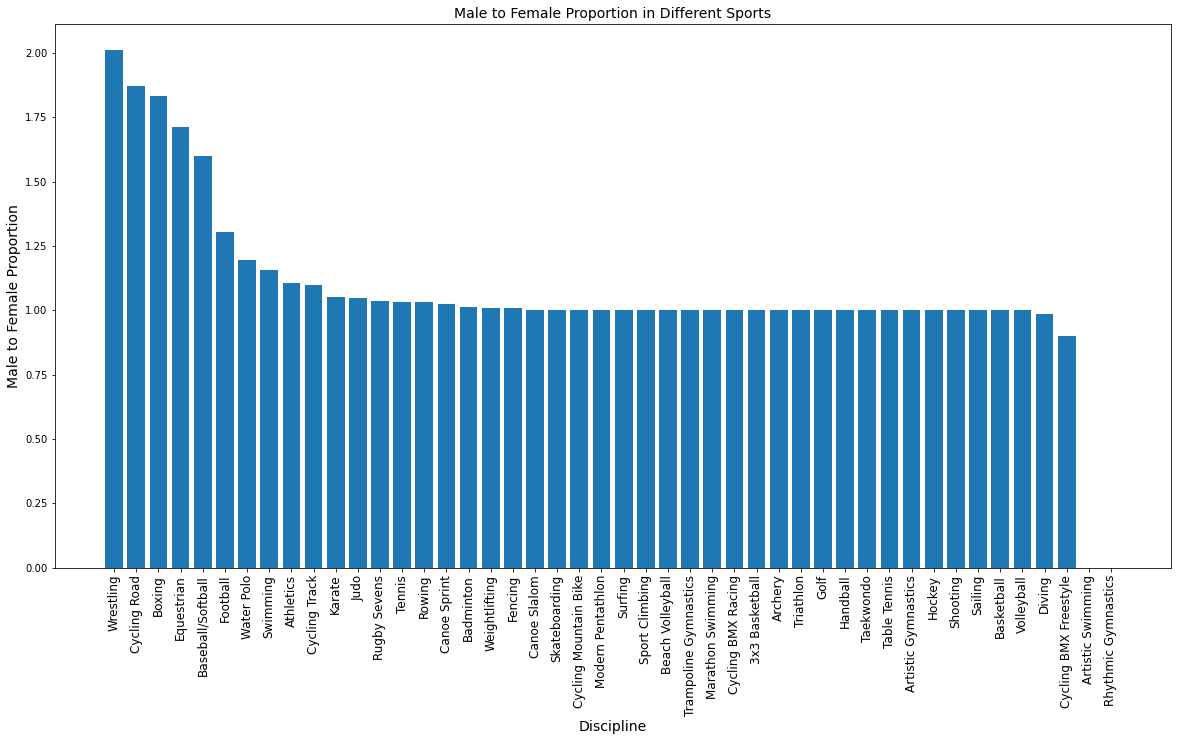

In [ ]:
#Bar Plot for Male feamle proportion across different sports
plt.figure(figsize=(20,10))
plt.xlabel("Discipline", size = 14)
plt.ylabel("Male to Female Proportion" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Male to Female Proportion in Different Sports", size = 14)
plt.bar(sorted_gender.Discipline, sorted_gender['Male Female Proportion'], width=0.8)
plt.show()

### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

In [ ]:
medal_data.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [ ]:
Gold_Max = medal_data['Team/NOC'][medal_data.Gold == medal_data.Gold.max()]
print("The country who received most Gold Medals is ", Gold_Max.item())

The country who received most Gold Medals is  United States of America


In [ ]:
Silver_Max = medal_data['Team/NOC'][medal_data.Silver == medal_data.Silver.max()]
print("The country who received most Silver Medals is ", Silver_Max.item())

The country who received most Silver Medals is  United States of America


In [ ]:
Bronze_Max = medal_data['Team/NOC'][medal_data.Bronze == medal_data.Bronze.max()]
print("The country who received most Bronze Medals is ", Bronze_Max.item())

The country who received most Bronze Medals is  United States of America


In [ ]:
Gold_Min = medal_data['Team/NOC'][medal_data.Gold == medal_data.Gold.min()]
print("The countries who received minimum Gold Medals are ", str(Gold_Min.values)[1:-1])

The countries who received minimum Gold Medals are  'Colombia' 'Azerbaijan' 'Dominican Republic' 'Armenia' 'Kyrgyzstan'
 'Mongolia' 'Argentina' 'San Marino' 'Jordan' 'Malaysia' 'Nigeria'
 'Bahrain' 'Saudi Arabia' 'Lithuania' 'North Macedonia' 'Namibia'
 'Turkmenistan' 'Kazakhstan' 'Mexico' 'Finland' 'Botswana' 'Burkina Faso'
 "Côte d'Ivoire" 'Ghana' 'Grenada' 'Kuwait' 'Republic of Moldova'
 'Syrian Arab Republic'


In [ ]:
Silver_Min = medal_data['Team/NOC'][medal_data.Silver == medal_data.Silver.min()]
print("The countries who received minimum Silver Medals are ", str(Silver_Min.values)[1:-1])

The countries who received minimum Silver Medals are  'Uzbekistan' 'Ireland' 'Israel' 'Qatar' 'Bahamas' 'Kosovo' 'Estonia'
 'Fiji' 'Latvia' 'Thailand' 'Bermuda' 'Morocco' 'Puerto Rico' 'Kazakhstan'
 'Mexico' 'Finland' 'Botswana' 'Burkina Faso' "Côte d'Ivoire" 'Ghana'
 'Grenada' 'Kuwait' 'Republic of Moldova' 'Syrian Arab Republic'


In [ ]:
Bronze_Min = medal_data['Team/NOC'][medal_data.Bronze == medal_data.Bronze.min()]
print("The countries who received minimum Silver Medals are ", str(Bronze_Min.values)[1:-1])

The countries who received minimum Silver Medals are  'Sweden' 'Ecuador' 'Bahamas' 'Kosovo' 'Romania' 'Venezuela'
 'South Africa' 'Tunisia' 'Bermuda' 'Morocco' 'Puerto Rico' 'Bahrain'
 'Saudi Arabia' 'Lithuania' 'North Macedonia' 'Namibia' 'Turkmenistan'


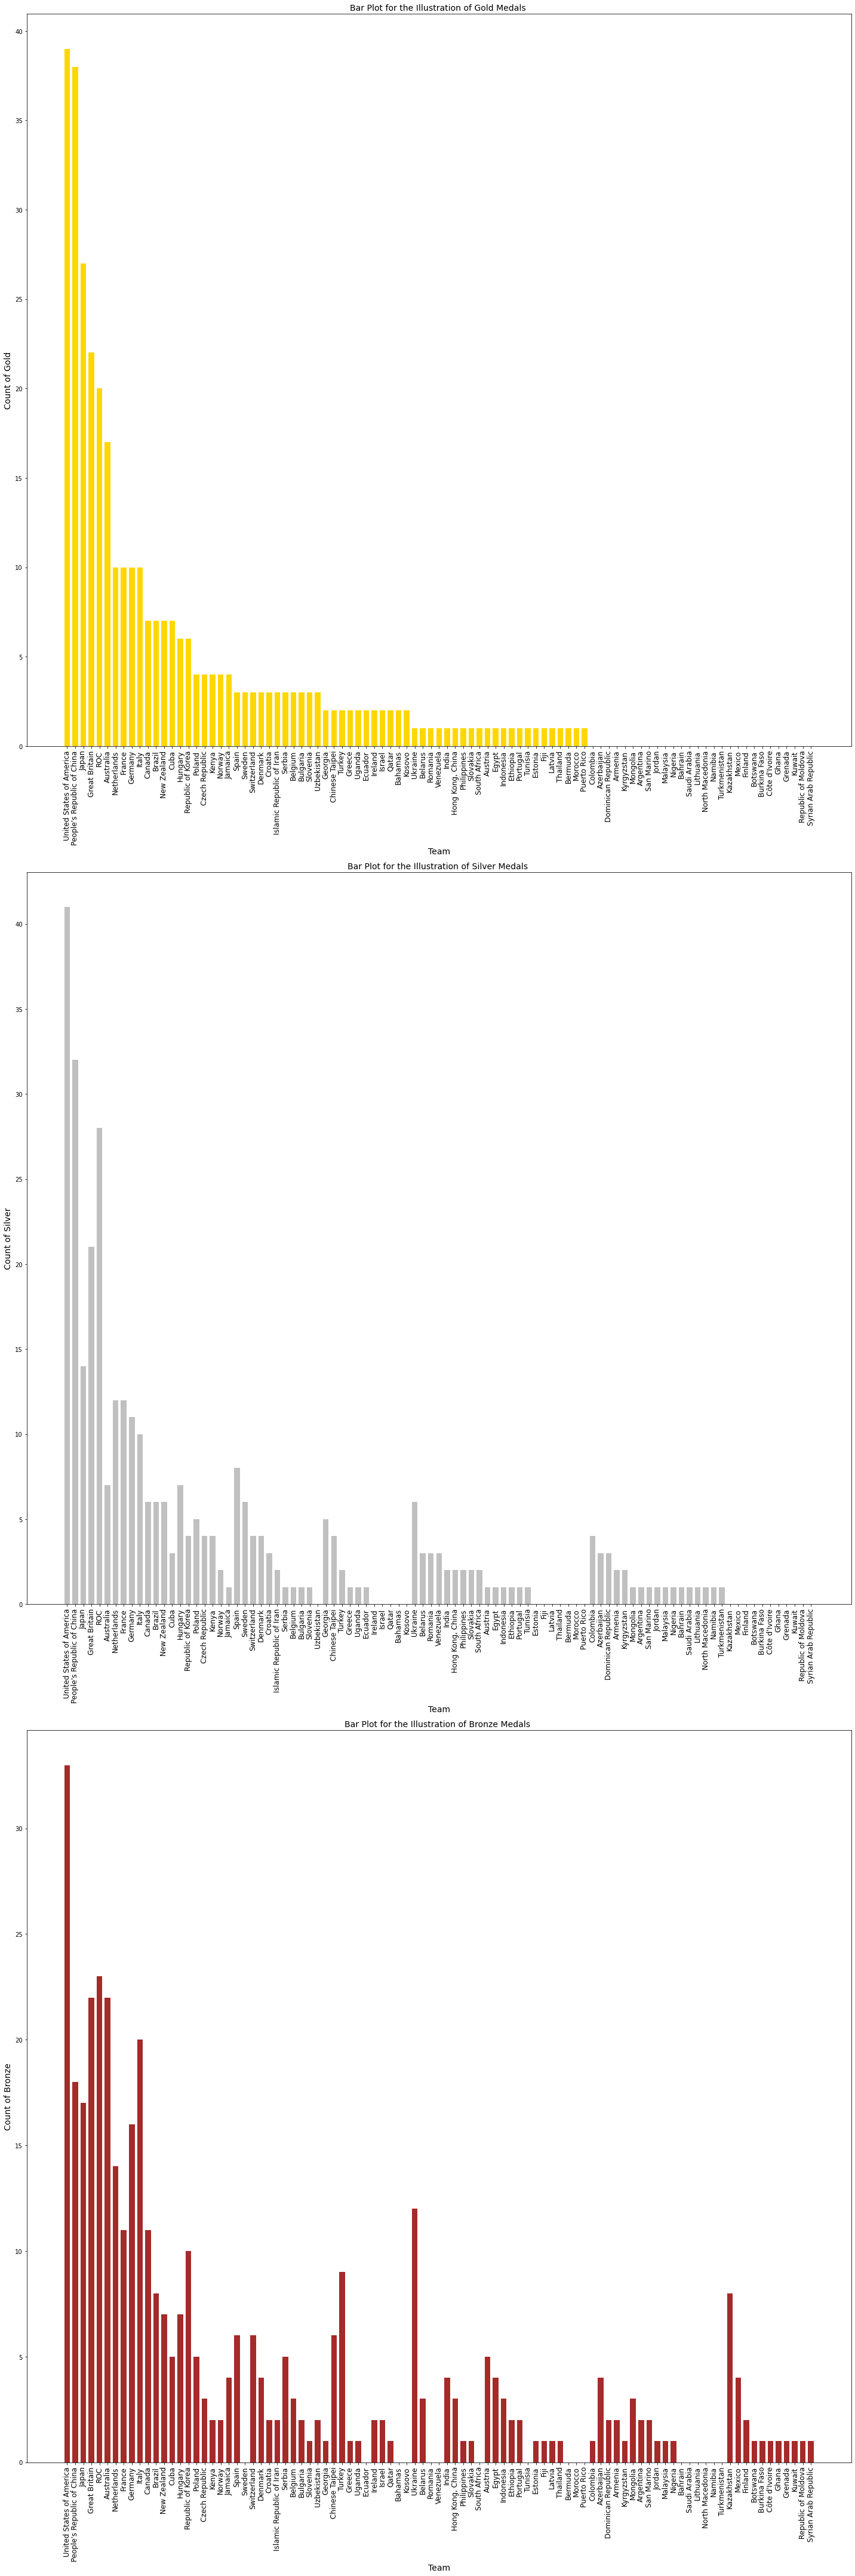

In [ ]:
#Bar plot for the illustration of Gold, Silver and Bronze Medals
plt.figure(figsize=(20,60))
plt.subplot(3, 1, 1)
plt.bar(medal_data['Team/NOC'] , medal_data.Gold , width = 0.7 , color = 'gold')
plt.xlabel("Team", size = 14)
plt.ylabel("Count of Gold" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Bar Plot for the Illustration of Gold Medals ", size = 14)

plt.subplot(3,1,2)
plt.bar(medal_data['Team/NOC'] , medal_data.Silver , width = 0.7, color = 'silver')
plt.xlabel("Team", size = 14)
plt.ylabel("Count of Silver" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Bar Plot for the Illustration of Silver Medals ", size = 14)

plt.subplot(3,1,3)
plt.bar(medal_data['Team/NOC'] , medal_data.Bronze, width = 0.7, color =  'brown')
plt.xlabel("Team", size = 14)
plt.ylabel("Count of Bronze" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Bar Plot for the Illustration of Bronze Medals ", size = 14)

plt.tight_layout()
plt.show()


### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

In [ ]:
medal_data['Team/NOC']

0       United States of America
1     People's Republic of China
2                          Japan
3                  Great Britain
4                            ROC
                 ...            
88                         Ghana
89                       Grenada
90                        Kuwait
91           Republic of Moldova
92          Syrian Arab Republic
Name: Team/NOC, Length: 93, dtype: object

In [ ]:
athlete_data.NOC

0         Norway
1          Spain
2          Italy
3          Spain
4          Spain
          ...   
11080    Germany
11081     Poland
11082        ROC
11083        ROC
11084     Poland
Name: NOC, Length: 11085, dtype: object

In [ ]:
#Find the total count of athletes for each country from athlete_data
Athelete_count = athlete_data.groupby('NOC').count()

Athelete_count.rename(columns={'Discipline':'PerCapitaCount'},inplace=True)

#Create a new Series with the total count and NOC 
df11 = Athelete_count["PerCapitaCount"]

#Create a new dataframe by merging the medal_data with the df11
df_left = pd.merge(medal_data,df11, left_on='Team/NOC', right_on='NOC',how='left' )

#Create a new column by dividing the total medal count with PerCapitaCount
df_left['Total_Medals_PerCapita']= df_left['Total']/df_left['PerCapitaCount']

#Find the country corresponding to the maximum value of Total_Medals_PerCapita
Max_Medals_country = df_left['Team/NOC'][df_left.Total_Medals_PerCapita == df_left.Total_Medals_PerCapita.max()]

print("The country with Maximum number of Total medals per capita is ", Max_Medals_country.item())

The country with Maximum number of Total medals per capita is  San Marino


In [ ]:
#Country with Highest Gold Medals PerCapita

df_left['Gold_Medals_PerCapita'] = df_left['Gold']/df_left['PerCapitaCount']

#Find the country corresponding to the maximum value of Gold_Medals_PerCapita
Gold_Medals_country = df_left['Team/NOC'][df_left.Gold_Medals_PerCapita == df_left.Gold_Medals_PerCapita.max()]

print("The country with Maximum number of Gold medals per capita is ", Gold_Medals_country.item())


The country with Maximum number of Gold medals per capita is  Bermuda


In [ ]:
#Country with Highest Silver Medals PerCapita

df_left['Silver_Medals_PerCapita'] = df_left['Silver']/df_left['PerCapitaCount']

#Find the country corresponding to the maximum value of Silver_Medals_PerCapita
Silver_Medals_country = df_left['Team/NOC'][df_left.Silver_Medals_PerCapita == df_left.Silver_Medals_PerCapita.max()]

print("The country with Maximum number of Silver medals per capita is ", Silver_Medals_country.item())


The country with Maximum number of Silver medals per capita is  San Marino


In [ ]:
#Country with Highest Bronze Medals PerCapita

df_left['Bronze_Medals_PerCapita'] = df_left['Bronze']/df_left['PerCapitaCount']

#Find the country corresponding to the maximum value of Total_Medals_PerCapita
Bronze_Medals_country = df_left['Team/NOC'][df_left.Bronze_Medals_PerCapita == df_left.Bronze_Medals_PerCapita.max()]

print("The country with Maximum number of Bronze medals per capita is ", Bronze_Medals_country.item())


The country with Maximum number of Bronze medals per capita is  San Marino



### 9. List countries with no medals? 

In [ ]:
#Create a new Dataframe by merging the athlete_data and medal_data
No_Medal_countries = pd.merge(athlete_data, medal_data , left_on = 'NOC', right_on = 'Team/NOC', how = 'left')

#Find the countries with null value for medal
No_Medal = No_Medal_countries[No_Medal_countries.isnull().any(axis=1)]

#Identify the unique country lists
No_Medal_country_list = No_Medal.NOC.unique()

print("The list of countries with no medals are : ", str(No_Medal_country_list)[1:-1])

The list of countries with no medals are :  'Chile' 'Sudan' 'Singapore' 'Maldives' 'Malta' 'Sri Lanka' 'Mauritania'
 'Libya' 'Nauru' 'Guyana' 'Palestine' 'Cyprus' 'El Salvador'
 'Federated States of Micronesia' 'Angola' 'Congo' 'Monaco' 'Rwanda'
 'Samoa' 'Brunei Darussalam' 'Bangladesh' 'Benin' 'Trinidad and Tobago'
 'Senegal' 'Algeria' 'Tajikistan' 'Pakistan' 'Oman' 'Iraq'
 'Refugee Olympic Team' 'Yemen' 'Niger' 'Djibouti' 'Somalia'
 'United Arab Emirates' 'Paraguay' 'Costa Rica' 'Honduras' 'Cape Verde'
 'Peru' 'Guam' 'Madagascar' 'Haiti' 'Montenegro' 'Afghanistan' 'Uruguay'
 'Panama' 'Cameroon' 'Togo' 'Seychelles' 'Guinea' 'Zambia' 'Nicaragua'
 'Sierra Leone' 'Guatemala' 'Papua New Guinea' 'Gambia' 'Lebanon'
 'Cook Islands' 'Barbados' 'Luxembourg' 'Nepal' 'Kiribati' 'Malawi'
 'Democratic Republic of the Congo' "Lao People's Democratic Republic"
 'St Vincent and the Grenadines' 'Albania' 'Guinea-Bissau' 'Bolivia'
 'Bosnia and Herzegovina' 'Saint Lucia' 'Palau' 'Mauritius'
 'Saint Kitt

### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

In [ ]:
country_greatest_coach = coach_data.NOC.value_counts().sort_values(ascending = False).idxmax()
print("The country that had greatest number of coaches is ",country_greatest_coach )

The country that had greatest number of coaches is  Japan


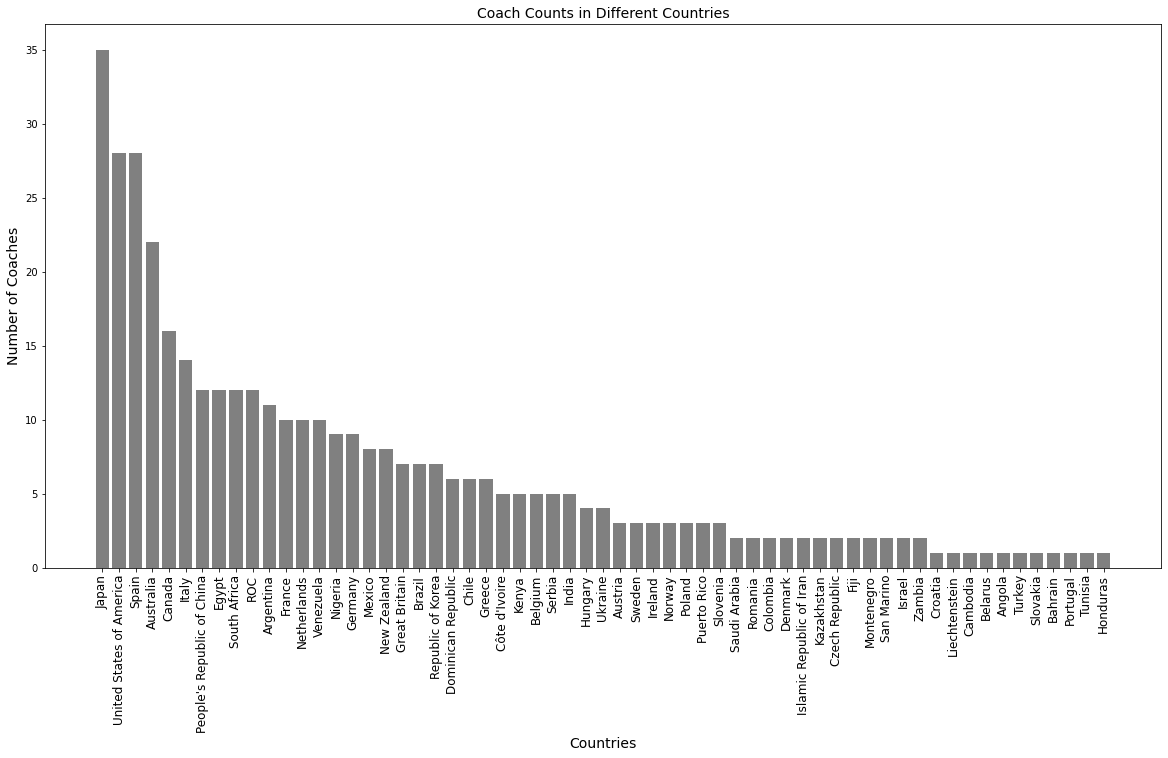

In [ ]:
# Find the number of coaches for each country
coach_counts = coach_data.NOC.value_counts().sort_values(ascending = False)

#Plot the graph
plt.figure(figsize=(20,10))
plt.xlabel("Countries", size = 14)
plt.ylabel("Number of Coaches" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Coach Counts in Different Countries", size = 14)
plt.bar(coach_counts.index, coach_counts, width=0.8, color = 'grey')
plt.show()

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

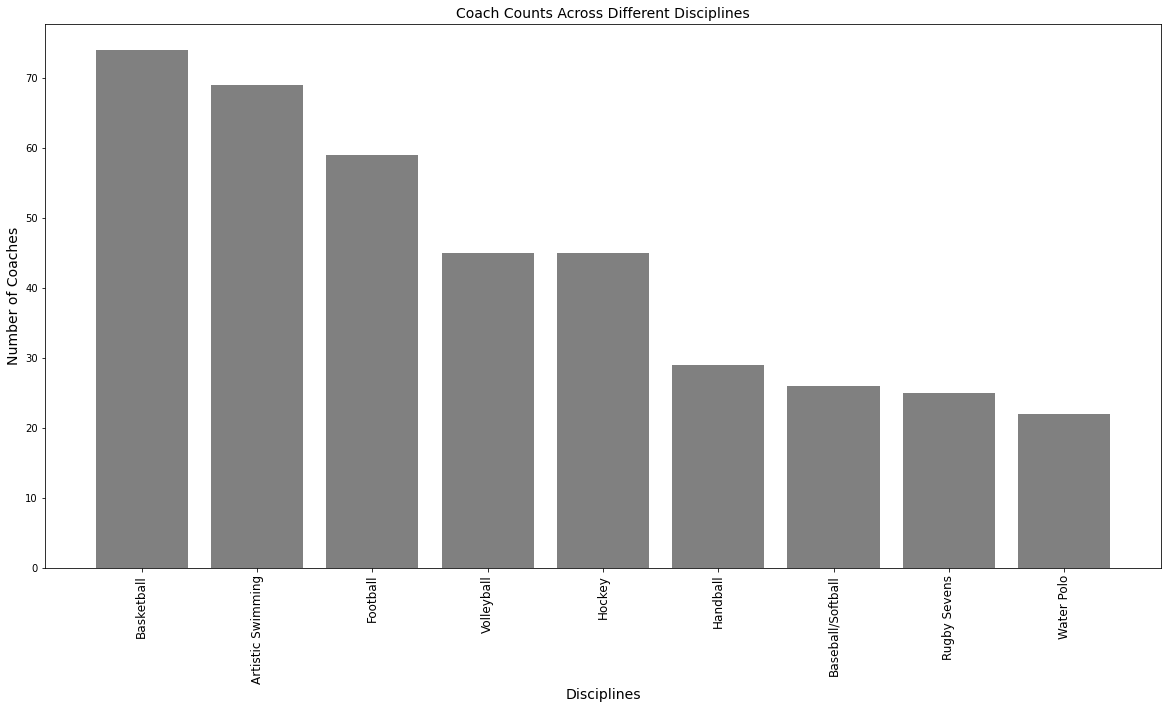

In [ ]:
#Find the number of coaches for each sports
coach_counts_discipline = coach_data.Discipline.value_counts().sort_values(ascending = False)

#Plot the graph
plt.figure(figsize=(20,10))
plt.xlabel("Disciplines", size = 14)
plt.ylabel("Number of Coaches" , size =14)
plt.xticks(rotation = 'vertical' ,size = 12)
plt.title("Coach Counts Across Different Disciplines", size = 14)
plt.bar(coach_counts_discipline.index, coach_counts_discipline, width=0.8, color = 'Grey')
plt.show()

### 12. Identify the most popular coach, female and male athlete first name? 

In [ ]:
##Most popular first name for coach

#Grab the first word of the Name column in coach_data as a new column 'FirstName'
coach_data[['FirstName']] = coach_data['Name'].str.split().str.get(0)

#Find the maximum repeated first name
CoachFirstName = coach_data.groupby('FirstName').size().idxmax()  
print("The most popular first name for coach is ",CoachFirstName)

The most popular first name for coach is  de


**Since the given datasets doesnot exactly give option to identify the name of an athlete as Men or Women, we could not identify the most popular name for female and male athlet.Hence , I am going here with the most popular name for the athlete.**

In [ ]:

#Grab the first word of the Name column in coach_data as a new column 'FirstName'
athlete_data[['FirstName']] = athlete_data['Name'].str.split().str.get(0)

#Find the maximum repeated first name
AthleteFirstName = athlete_data.groupby('FirstName').size().idxmax()  
print("The most popular first name for athlete is ",AthleteFirstName)

The most popular first name for athlete is  van
